In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("online_retail.csv", encoding='ISO-8859-1')

# Display basic info
print("Shape:", df.shape)
print("\nColumn Info:")
print(df.info())

# Display first few rows
df.head()


Shape: (541909, 8)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
df.duplicated().sum()


np.int64(5268)

In [4]:
df[df['InvoiceNo'].astype(str).str.startswith('C')].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom


In [5]:
df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom


Data Preprocessing


In [6]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Drop rows with missing Description
df = df.dropna(subset=['Description'])

# Remove canceled invoices (InvoiceNo starts with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove rows with negative or zero Quantity or UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert CustomerID to integer (optional, for grouping)
df['CustomerID'] = df['CustomerID'].astype(int)

# Reset index
df.reset_index(drop=True, inplace=True)

# Check final shape and preview
print("Cleaned dataset shape:", df.shape)
df.head()


Cleaned dataset shape: (397884, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850,United Kingdom


EDA

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15532\1545377752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


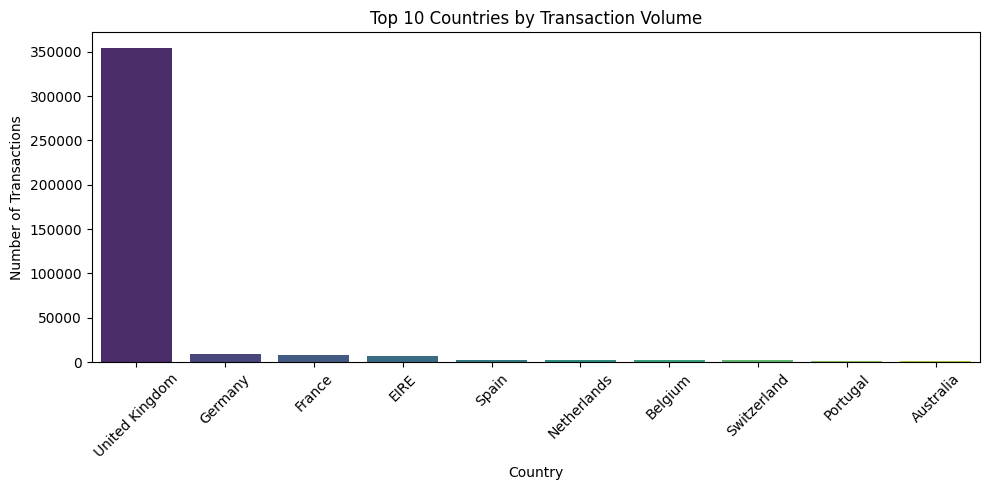

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries by Transaction Volume')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15532\1786343165.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


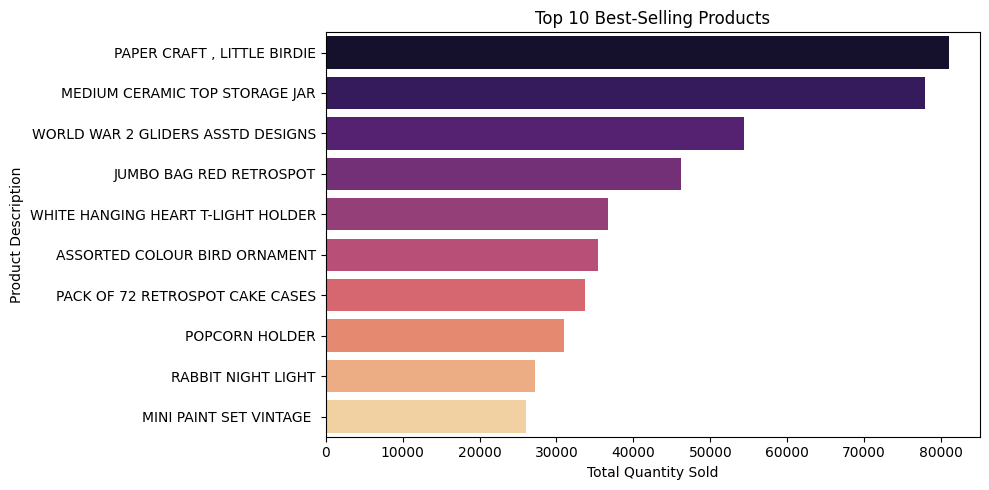

In [8]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


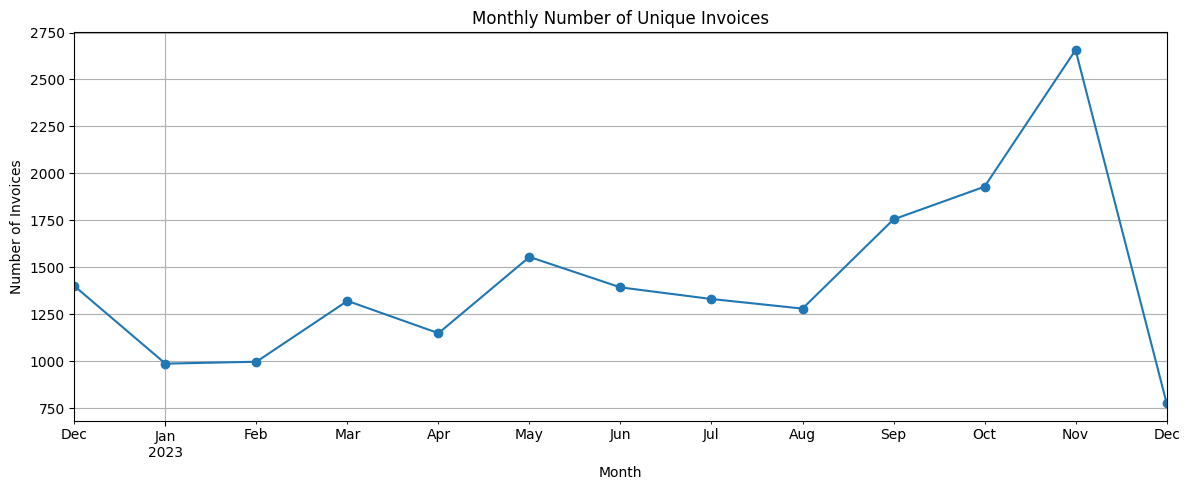

In [9]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month').InvoiceNo.nunique()

monthly_sales.plot(kind='line', figsize=(12,5), marker='o')
plt.title('Monthly Number of Unique Invoices')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.grid()
plt.tight_layout()
plt.show()


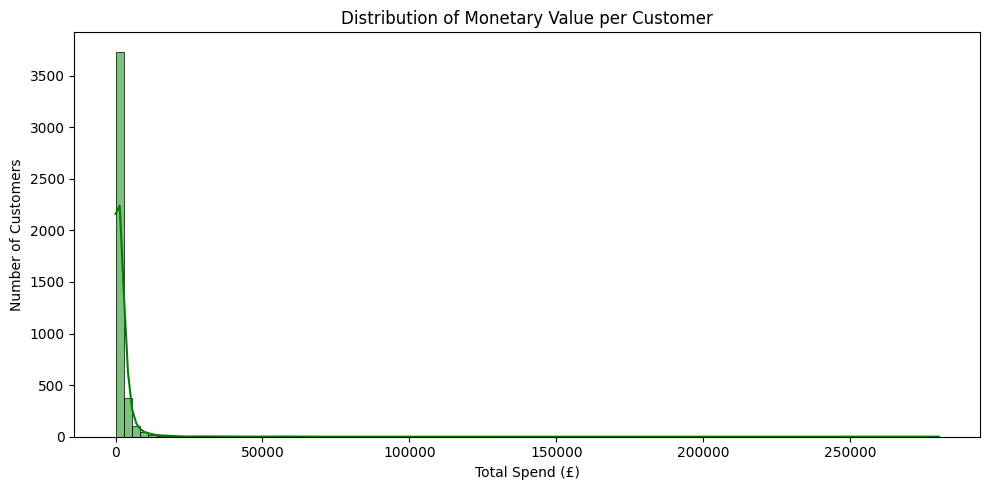

In [10]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

monetary_per_customer = df.groupby('CustomerID')['TotalAmount'].sum()

plt.figure(figsize=(10,5))
sns.histplot(monetary_per_customer, bins=100, kde=True, color='green')
plt.title('Distribution of Monetary Value per Customer')
plt.xlabel('Total Spend (£)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


Clustering


In [11]:
import datetime as dt

# Reference date = 1 day after the last invoice date
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Grouping by CustomerID
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                               # Frequency
    'TotalAmount': 'sum'                                  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


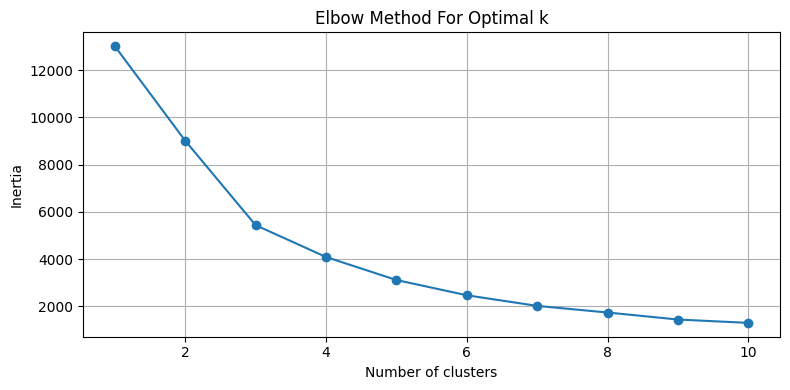

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.tight_layout()
plt.show()


In [14]:
# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [15]:
# Analyze cluster characteristics
rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).round(1)


,Recency,Frequency,Monetary,CustomerID
Cluster,,,,
0,43.7,3.7,1359.0,3054
1,248.1,1.6,480.6,1067
2,7.4,82.5,127338.3,13
3,15.5,22.3,12709.1,204


In [17]:
cluster_map = {
    2: 'High-Value',
    3: 'Regular',
    0: 'Occasional',
    1: 'At-Risk'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_map)


In [18]:
import joblib

# Save the scaler and KMeans model
joblib.dump(scaler, 'scaler_rfm.pkl')
joblib.dump(kmeans, 'kmeans_rfm.pkl')


['kmeans_rfm.pkl']

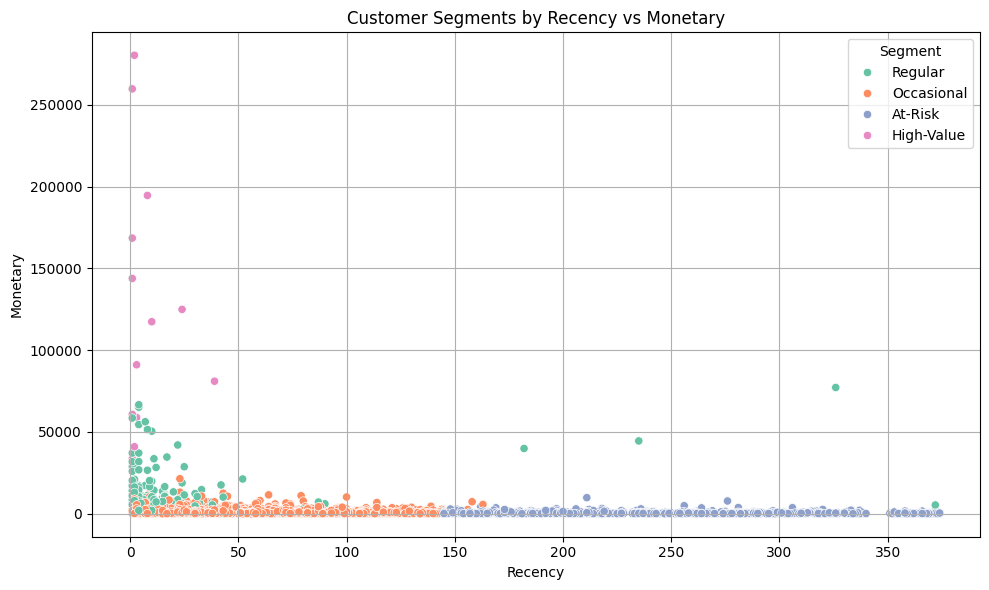

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2')
plt.title('Customer Segments by Recency vs Monetary')
plt.grid()
plt.tight_layout()
plt.show()


Item-Based Collaborative Filtering Product Recommendation System

In [20]:
# Pivot table: Rows = StockCode (product), Columns = CustomerID, Values = Quantity
product_customer_matrix = df.pivot_table(
    index='StockCode',
    columns='CustomerID',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity between products
product_similarity = cosine_similarity(product_customer_matrix)

# Convert to DataFrame for easier lookup
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=product_customer_matrix.index,
    columns=product_customer_matrix.index
)


In [22]:
# Create StockCode → Description mapping (use mode in case of duplicates)
product_names = df.groupby('StockCode')['Description'].agg(lambda x: x.mode()[0])


In [25]:
def recommend_similar_products(product_name, top_n=5):
    # Find StockCode from product name
    matches = product_names[product_names.str.contains(product_name, case=False, na=False)]
    
    if matches.empty:
        print("❌ Product not found.")
        return []
    
    stock_code = matches.index[0]  # Take first match
    print(f" Found product: {product_names[stock_code]} (StockCode: {stock_code})")
    
    # Get top N similar product codes (excluding the product itself)
    similar_scores = product_similarity_df[stock_code].sort_values(ascending=False)[1:top_n+1]
    similar_codes = similar_scores.index
    
    return product_names[similar_codes].tolist()


In [24]:
recommend_similar_products("WHITE METAL LANTERN")


✅ Found product: WHITE METAL LANTERN (StockCode: 71053)


['RED RETROSPOT SUGAR JAM BOWL',
 'RED RETROSPOT SMALL MILK JUG',
 'BLACK MINI TAPE MEASURE ',
 " 50'S CHRISTMAS GIFT BAG LARGE",
 'FANCY FONT BIRTHDAY CARD, ']